In [1]:
%matplotlib inline

import json
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import results_heatmap
from dataset import SNPmarkersDataset

In [3]:
phenotypes = list(SNPmarkersDataset(mode='validation', skip_check=True, dir_path="../../Data/").phenotypes.keys())

 - only ep_res (as very long)
 - json generated from the log file due to the error
 - the range [1e-4, 1e-5] and [1,10] seems the better area to evaluate, if not trying to expend toward [1e-6,10] and [1e-4,100] could be appropriate 

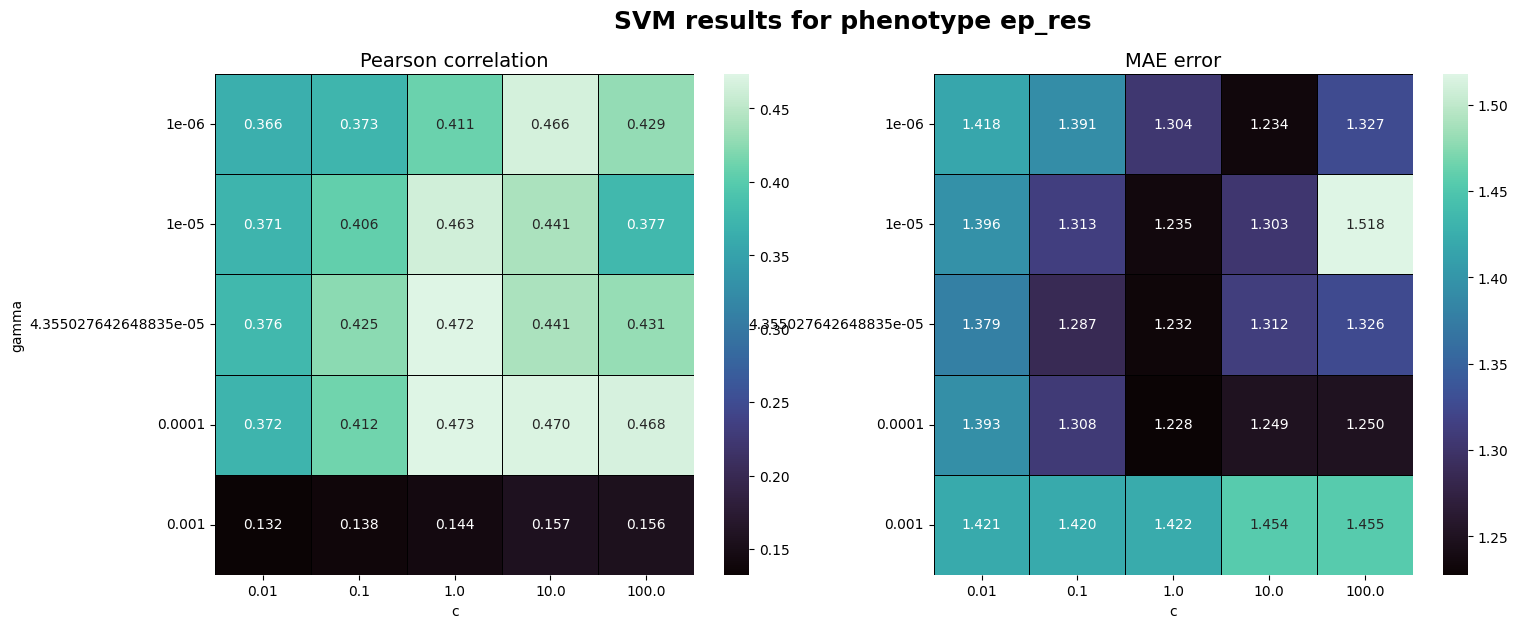

In [5]:
for phenotype in phenotypes:
    with open(f"../Results/SVM_{phenotype}.json", "r") as f:
        results = json.load(f)
        corr_df = pd.DataFrame(np.array(results["correlation"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        MAE_df = pd.DataFrame(np.array(results["MAE"]), index= results["dim_0_values"], columns= results["dim_1_values"])
        results_heatmap(corr_df, MAE_df, f"SVM results for phenotype {phenotype}", "Pearson correlation", "MAE error", results["dim_1_label"],  results["dim_0_label"])
        break